# First steps in deep learning with Keras

* [Piotr Migdał](http://p.migdal.pl/), PhD (freelancer / [deepsense.io](https://deepsense.io/))
* 12 Jan 2017, [PyData Warsaw #8: Deep & Machine Learning + After Party](https://www.meetup.com/PyData-Warsaw/events/233440464/)

![](https://gist.github.com/stared/7de2908b9bcba01c39ee3c591875a23c/raw/7ecdca36cbf4de45a92385e57f95aa0d51421387/z_dl_meme.png)

## Why deep learning?

* recent progress in image recognition, painting style transfer, text translation, AlphaGo etc
* or e.g.: [Colorful Image Colorization](http://richzhang.github.io/colorization/) (grayscale -> RGB):

[![](https://gist.github.com/stared/7de2908b9bcba01c39ee3c591875a23c/raw/7ecdca36cbf4de45a92385e57f95aa0d51421387/z_colorization.jpg)](http://richzhang.github.io/colorization/)

* ...but I won't give an introduction to deep learning (this time) - only to one tool

## What is Keras?

from https://keras.io:

> ### Keras: Deep Learning library for Theano and TensorFlow
>
> Keras is a **high-level neural networks** library, written in **Python** and capable of running on top of either **TensorFlow** or **Theano**. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Note: 

> Keras (κέρας) means horn in Greek.

So, please don't confuse its name with *caress* /kəˈres/ or *karaś*.

## Why Keras?

* easy (to write and read)
* popular (a lot of blog posts and code samples)
* active (features and libraries appearing all the time)
* good documentation (with intro to neural networks, not only API)


[![](https://gist.github.com/stared/7de2908b9bcba01c39ee3c591875a23c/raw/7ecdca36cbf4de45a92385e57f95aa0d51421387/z_twitter.png)](https://twitter.com/fchollet/status/765212287531495424)


I use Keras to give introductions to artificial neural networks:

* big companies (I am instructor at [deepsense.io](https://workshops.deepsense.io/))
* gifted high-school students ([Krajowy Fundusz na rzecz Dzieci](http://crastina.se/gifted-children-in-poland-by-piotr-migdal/))

I don't want to **talk** about Keras, I want to **show** it!

## Data loading

(The boring stuff.)

Keras has some built-in dataset downloaders: https://keras.io/datasets/ to make starting even easier.

I will work on the MNIST digit recognition dataset (60k grayscale 28x28 images); benchmarks: http://yann.lecun.com/exdb/mnist/.

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
img_size = 28

# reshaping
# for TensorFlow: (datapoints, x, y, channels)
# for Theano it would need (datapoints, channels, x, y) 
X_train = X_train.reshape(-1, img_size, img_size, 1)
X_test = X_test.reshape(-1, img_size, img_size, 1)

# 0-255 integers to 0-1 floats
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# answers to probability vectors
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [3]:
X_train.shape

(60000, 28, 28, 1)

In [4]:
Y_train.shape

(60000, 10)

In [5]:
Y_train[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [6]:
# plotting and visualization
%matplotlib inline
# import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

It is:  2


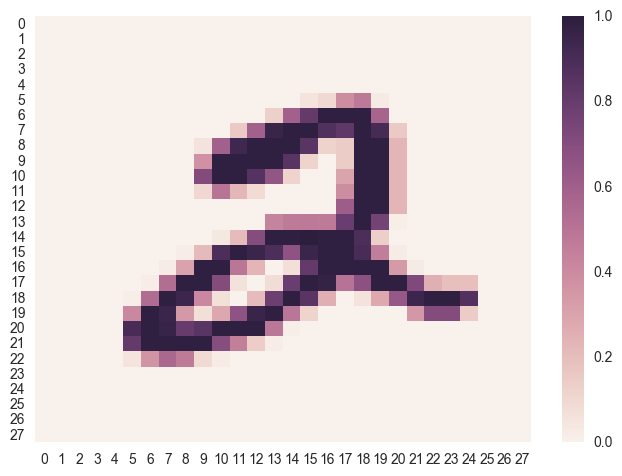

In [7]:
# what's inside
nth_digit = 5
print("It is: ", y_train[nth_digit])
sns.heatmap(X_train[nth_digit].reshape(img_size, img_size));

## Logistic regression in Keras

In [8]:
# importing layers from Keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Convolution2D, MaxPooling2D, Dropout

In [9]:
# creating a model
model = Sequential()

model.add(Flatten(input_shape=(img_size, img_size, 1)))
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [10]:
# training
model.fit(X_train, Y_train,
          nb_epoch=5,
          batch_size=32,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s - loss: 0.4701 - acc: 0.8783 - val_loss: 0.3048 - val_acc: 0.9158
Epoch 2/5
60000/60000 [==============================] - 4s - loss: 0.3036 - acc: 0.9155 - val_loss: 0.2834 - val_acc: 0.9198
Epoch 3/5
60000/60000 [==============================] - 5s - loss: 0.2832 - acc: 0.9212 - val_loss: 0.2767 - val_acc: 0.9225
Epoch 4/5
60000/60000 [==============================] - 5s - loss: 0.2726 - acc: 0.9243 - val_loss: 0.2702 - val_acc: 0.9250
Epoch 5/5
60000/60000 [==============================] - 5s - loss: 0.2666 - acc: 0.9258 - val_loss: 0.2646 - val_acc: 0.9269


In [11]:
# showing network structure & number of parameters
# pip install git+git://github.com/stared/keras-sequential-ascii.git
from keras_sequential_ascii import sequential_model_to_ascii_printout
sequential_model_to_ascii_printout(model)

      OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

          Input   #####   (28, 28, 1)
        Flatten   ||||| -------------------         0     0.0%
                  #####   (784,)
          Dense   XXXXX -------------------      7850   100.0%
        softmax   #####   (10,)


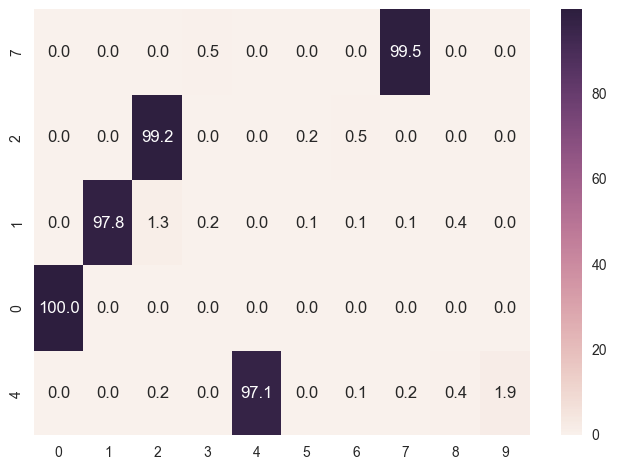

In [12]:
# predictions
sns.heatmap(100 * model.predict(X_test[:5]),
            yticklabels=y_test[:5],
            annot=True, fmt='.1f');

In [13]:
# a nicer progress bar
# pip install keras-tqdm
from keras_tqdm import TQDMNotebookCallback
# and let's save history

In [14]:
history = model.fit(X_train, Y_train,
                    nb_epoch=5,
                    batch_size=32,
                    validation_data=(X_test, Y_test),
                    verbose=0,
                    callbacks=[TQDMNotebookCallback(leave_inner=False)])

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installe

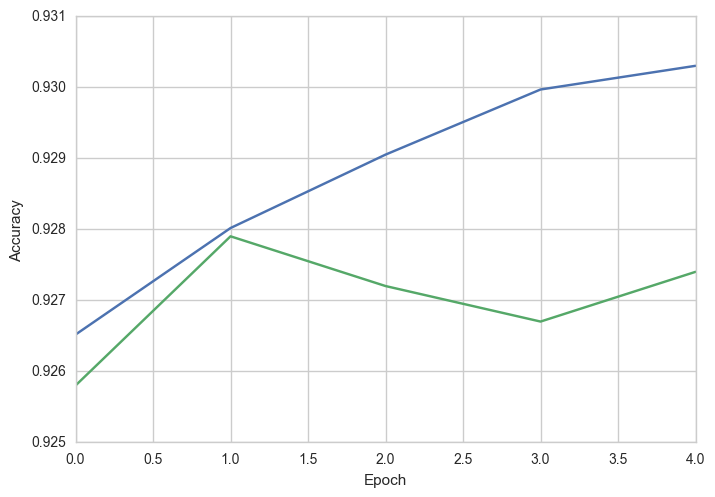

In [15]:
# plotting learning process
sns.plt.plot(range(5), history.history["acc"])
sns.plt.plot(range(5), history.history["val_acc"])
sns.plt.xlabel("Epoch")
sns.plt.ylabel("Accuracy")

## ConvNets!

Convolutions are able to learn local features.

[![](https://gist.github.com/stared/7de2908b9bcba01c39ee3c591875a23c/raw/7ecdca36cbf4de45a92385e57f95aa0d51421387/z_convolution.png)](http://setosa.io/ev/image-kernels/ )

In [16]:
# our first ConvNet!
n_channels = 8
conv_size = 3
pool_size = 2

model = Sequential()

model.add(Convolution2D(n_channels, conv_size, conv_size,
                        input_shape=(img_size, img_size, 1)))
model.add(Activation("relu"))
model.add(MaxPooling2D((pool_size, pool_size)))

## we can add more layers!
# model.add(Convolution2D(4 * n_channels, conv_size, conv_size))
# model.add(Activation("relu"))
# model.add(MaxPooling2D((pool_size, pool_size)))

model.add(Flatten())
# model.add(Dropout(0.5))  # or dropout for regularization
model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [17]:
sequential_model_to_ascii_printout(model)

      OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

          Input   #####   (28, 28, 1)
  Convolution2D    \|/  -------------------        80     0.6%
           relu   #####   (26, 26, 8)
   MaxPooling2D   YYYYY -------------------         0     0.0%
                  #####   (13, 13, 8)
        Flatten   ||||| -------------------         0     0.0%
                  #####   (1352,)
          Dense   XXXXX -------------------     13530    99.4%
        softmax   #####   (10,)


In [18]:
history = model.fit(X_train, Y_train,
                    nb_epoch=5,
                    batch_size=32,
                    validation_data=(X_test, Y_test),
                    verbose=0,
                    callbacks=[TQDMNotebookCallback()])

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installe

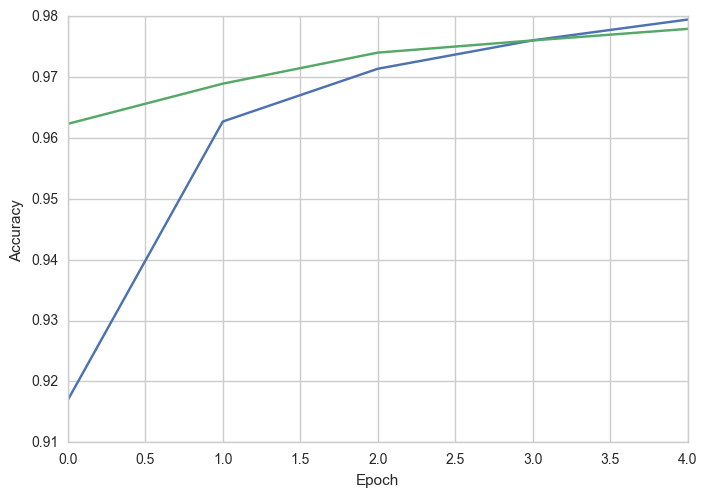

In [19]:
# plotting learning history
sns.plt.plot(range(5), history.history["acc"])
sns.plt.plot(range(5), history.history["val_acc"])
sns.plt.xlabel("Epoch")
sns.plt.ylabel("Accuracy")

## Real networks...

...can be expressed in Keras.

In [20]:
def VGG16_simpler(weights_path=None):
    model = Sequential()
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='conv1_1', input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='conv1_2'))
    model.add(MaxPooling2D((2,2)))

    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='conv2_1'))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same', name='conv2_2'))
    model.add(MaxPooling2D((2,2)))

    model.add(Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='conv3_1'))
    model.add(Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='conv3_2'))
    model.add(Convolution2D(256, 3, 3, activation='relu', border_mode='same', name='conv3_3'))
    model.add(MaxPooling2D((2,2)))

    model.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='conv4_1'))
    model.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='conv4_2'))
    model.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='conv4_3'))
    model.add(MaxPooling2D((2,2)))

    model.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='conv5_1'))
    model.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='conv5_2'))
    model.add(Convolution2D(512, 3, 3, activation='relu', border_mode='same', name='conv5_3'))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten(name="flatten"))
    model.add(Dense(4096, activation='relu', name='dense_1'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu', name='dense_2'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, name='dense_3'))
    model.add(Activation("softmax",name="softmax"))

    if weights_path:
        model.load_weights(weights_path)
    return model

## More cool Keras add-ons

* [keras-tqdm](https://github.com/bstriner/keras-tqdm) - nicer progress bars
* [keras.js](https://transcranial.github.io/keras-js/) - convert Keras models to JavaScript, runnable in a browser (simplest GPU support ever!)
* [quiver](https://github.com/jakebian/quiver) - interactive ConvNet features visualization for Keras
* [ASCII summary for sequential models](https://github.com/stared/keras-sequential-ascii) - I started developing :)

## Where to learn deep learning?

* [Neural Networks Demystified](http://lumiverse.io/series/neural-networks-demystified) - smooth introduction
* [Image Kernels - Explained Visually](http://setosa.io/ev/image-kernels/) - on 2d convolutions
* [Building a simple neural-network with Keras](https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb)
* [How convolutional neural networks see the world - Keras Blog](https://blog.keras.io/how-convolutional-neural-networks-see-the-world.html)
* [Deep Learning with Keras - Tutorial @ EuroScipy 2016](https://github.com/leriomaggio/deep-learning-keras-tensorflow)
* [Ian Goodfellow and Yoshua Bengio and Aaron Courville, Deep Learning, An MIT Press book](http://www.deeplearningbook.org/) ([and just PDF](https://github.com/HFTrader/DeepLearningBook))
* [TensorFlow Tutorials](https://www.tensorflow.org/versions/master/tutorials/index.html)
* [CS231n: Convolutional Neural Networks for Visual Recognition by Andrej Karpathy](http://cs231n.github.io/) and [its videos](https://www.youtube.com/playlist?list=PLLvH2FwAQhnpj1WEB-jHmPuUeQ8mX-XXG)
* [How to train your Deep Neural Network](http://rishy.github.io/ml/2017/01/05/how-to-train-your-dnn/) - how many layers, parameters, etc
* [A Guide to Deep Learning by YN^2](http://yerevann.com/a-guide-to-deep-learning/)

## Thank you! Questions?

* for contact & content see [p.migdal.pl](http://p.migdal.pl/)
* read my last blog post on word2vec: [king - man + woman is queen; but why?](http://p.migdal.pl/2017/01/06/king-man-woman-queen-why.html) (over 250 upvotes on HN!)
* check machine learnings trainings at [workshops.deepsense.io](https://workshops.deepsense.io/)